In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('HAM10000_metadata.csv')
dataset.drop(['lesion_id','image_id','dx_type'], axis=1, inplace=True)
dataset.head()

,dx,age,sex,localization
0,bkl,80.0,male,scalp
1,bkl,80.0,male,scalp
2,bkl,80.0,male,scalp
3,bkl,80.0,male,scalp
4,bkl,75.0,male,ear


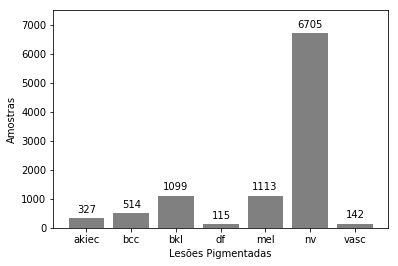

In [43]:
classes = []
freq = []
for i in range(len(dataset.groupby('dx').size())):
    classes.append(dataset.groupby('dx').size().index[i])
    freq.append(dataset.groupby('dx').size()[i])
    
plt.bar(classes, freq, color='grey')
plt.text(-0.2, 527, '327', fontsize=10)
plt.text(0.8, 700, '514', fontsize=10)
plt.text(1.7, 1299, '1099', fontsize=10)
plt.text(2.8, 315, '115', fontsize=10)
plt.text(3.7, 1313, '1113', fontsize=10)
plt.text(4.7, 6905, '6705', fontsize=10)
plt.text(5.8, 342, '142', fontsize=10)
plt.ylim([0,7500])
plt.xlabel('Lesões Pigmentadas')
plt.ylabel('Amostras')
# plt.title('Distribuição de Frequencias para as doenças\n')
plt.savefig('Ditribuicao de Freuqncias - Dataset.jpg')
plt.show()

In [24]:
print(dataset.groupby('dx').size())

dx
akiec     327
bcc       514
bkl      1099
df        115
mel      1113
nv       6705
vasc      142
dtype: int64


Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


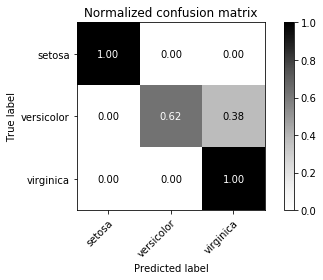

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names,
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix', cmap=plt.cm.Greys)

plt.show()